# Kalorimetrie Laborversuch

Author: Jannik Hoffmann

Datum: 14.12.2023

Gruppe: 09

## Forschungsfrage

Kann mithilfe eines einfachen Versuchsaufbaues mit größtenteils günstigem Equitment die Wärmekapazitäten von Stoffen ermitteln werden? Sind diese Vergleichbar mit teuren Forschungsaufbauten?

## Versuchsaufbau und Durchführung

Auf dem Bild ist der verwendete Versuchsaufbau zu sehen. Zum Aufwärmen der Proben wird ein Heißwasserbad mit einem Sous-Vide-Garer genutzt. Im Gefäß links zu sehen findet der eigenliche Versuchsaufbau statt. In diesem wird eine bestimmte Menge Wasser gegeben. Die erhitzen Proben erwärmen das Wasser über die Zeit, genau das wird dabei gemessen. (Das Wasser am Anfang muss deutlich kälter als die erhitzen Proben sein). Um im Gefäß die Temperatur möglichst gut gemessen zu bekommen wird ein Magnetrührer benutzt der das Wasser während dem Versuch ständig rührt. Das Gefäß hat 3 Sensoren, die Umgebung dient als Referenz und hat einen Temperatursensor. Das Heißwasserbad hat ebenso einen Temperatursensor.


<img src="figures/Versuchsaufbau.jpg" width="800">


## Versuchsauswertung

In [279]:
import numpy as np                                                                #importieren der benötigten Bibiotheken
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json                                                      #importieren der benötigten funktionen
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [280]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = '/home/pi/calorimetry_laboratory/data/Measuring_Constant/Measuring_Constant.h5'   #Pfad zur h5 Datei des ersten Versuches

# DONE #

In [281]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const,'RawData')                           #directory mit allen groups & subgroups erstellen und ausgeben lassen 
#print(data_dict)

# DONE #

In [282]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]                                                                          #indexe festlegen, Einträge der Calorimeter Sensoren
index_environment = [3]                                                                                #index festlegen, Einträge des Environment Sensors

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [283]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

array_temperature = data_dict['temperature']                                                           #ein neues Array erstellen indem alle Einträge "temperature" aus dem dict vorhanden sind
array_time = data_dict['time']                                                                         #ein neues Array erstellen indem alle Einträge "time" aus dem dict vorhanden sind
array_calorimeter = [array_time[index_calorimeter[0]], array_temperature[index_calorimeter[0]], array_time[index_calorimeter[1]], array_temperature[index_calorimeter[1]], array_time[index_calorimeter[2]], array_temperature[index_calorimeter[2]]] #Neues Array fasst alle Temperatureinträge & Zeiteinträge der Calometrie Sensoren zusammen
array_environment = [array_time[index_environment[0]], array_temperature[index_environment[0]]]        #Neues Array fasst alle Temperatureinträge & Zeiteinträge des Environment Sensors zusammen
                   
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(array_calorimeter)                      #Funktion gibt ein Array zurück in dem 3 Arrays verschachtelt sind, 1 Array (gemittelte Temperatur), 1 Array (Standartabweichung Temperatur), 1 Array (gemittelte Zeit)
mean_std_environment = utility.cal_mean_and_standard_deviation(array_environment)                      #Funktion gibt ein Array zurück in dem 3 Arrays verschachtelt sind, 1 Array (gemittelte Temperatur), 1 Array (Standartabweichung Temperatur), 1 Array (gemittelte Zeit)
#print(mean_std_calorimeter)
#print(mean_std_environment)

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

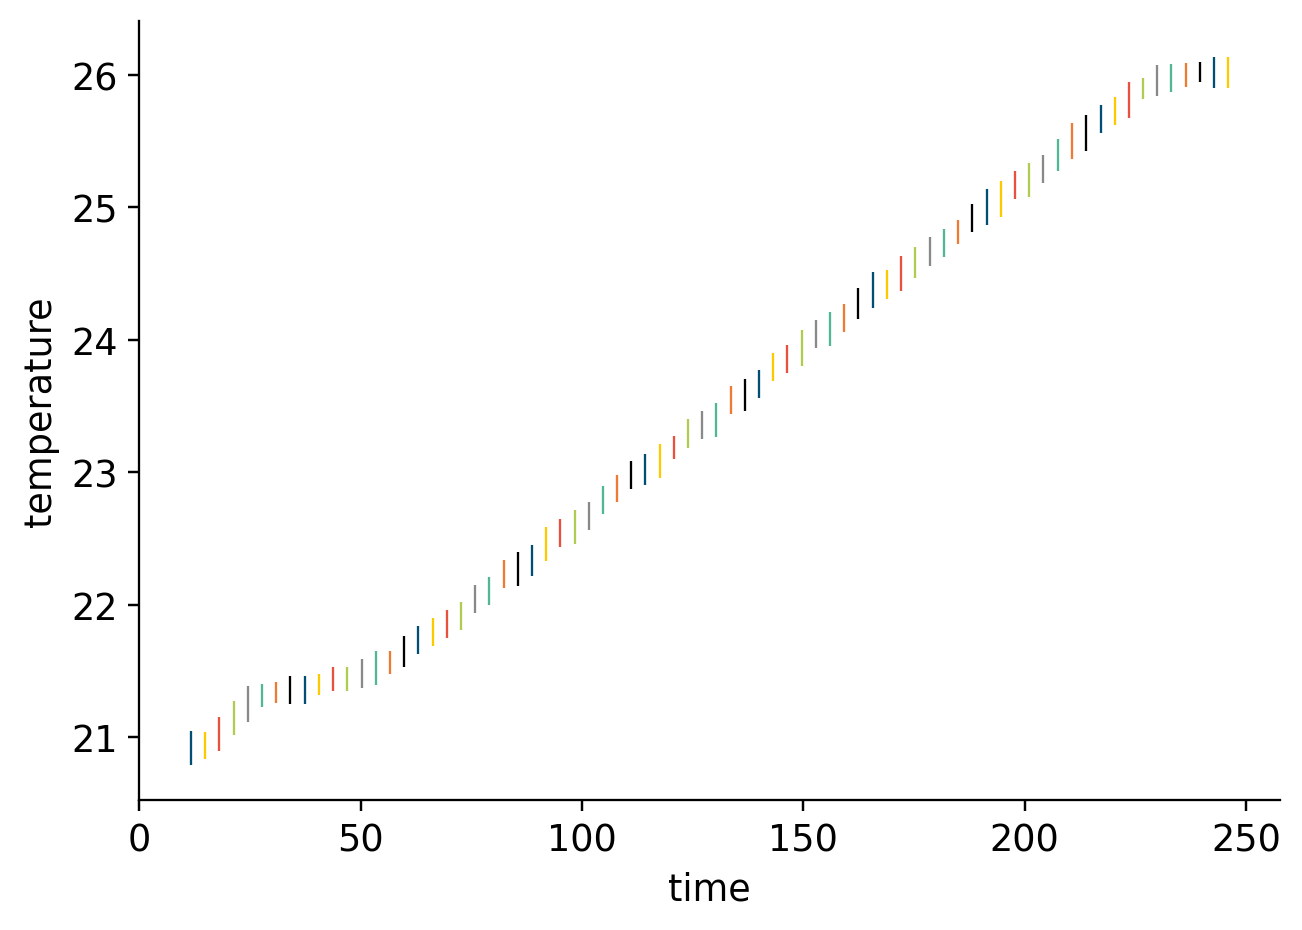

In [284]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting
array_temperature_standartabweichung = mean_std_calorimeter[0]                                                     #Array aufteilen (entnehmen gemittelte Temperaturen & Standartabweichungen)
#print(array_temperature_standartabweichung)
array_zeit = mean_std_calorimeter[1]                                                                               #Array aufteilen (entnehmen gemittelte Zeiten)
utility.plot_temp_over_time(array_temperature_standartabweichung, array_zeit, 'Legende', 'time', 'temperature')    #Plotten Temperatur-Zeit Diagramm mit Fehlerbalken (Standartabweichungen)

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [286]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

folder_path = "/home/pi/calorimetry_laboratory/datasheets"  
uuid = '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753' 
json_path = (["calorimeter","medium", "mass", "value"])
water_mass = m_json.get_json_entry(folder_path, uuid, json_path)                                      #Wassermasse aus json Datei auslesen lassen                                                           

# DONE #

In [287]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

with h5.File(datafile_path_const) as z:  
    current = np.array(z["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/Current"])                    #Strom aus h5 Datei auslesen lassen   
    heat_time = np.array(z["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/time"])                     #Zeit aus h5 Datei auslesen lassen   
    voltage = np.array(z["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/Voltage"])                    #Spannung aus h5 Datei auslesen lassen   

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [288]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

array_temperatur = array_temperature_standartabweichung[0]
temperature_end, temperature_start = utility.get_start_end_temperature(array_temperatur) 
#print(temperature_end)                                                                              #benötigte Temperatur T1 & T2 auslesen
#print(temperature_start)

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [289]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end - temperature_start)               #Formel für die Kalorimitrie Konstante implementieren            

# DONE #

#### (Vii) Ergebnis

In [290]:
calorimeter_const_2 = (calorimeter_const, 'J/K')
print (calorimeter_const_2)                                                                         #Kalorimetrie Konstante ausgeben lassen 

(1805.5836734693885, 'J/K')


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [291]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = '/home/pi/calorimetry_laboratory/data/Measuring_Probe_1/Measuring_Probe_1.h5'  #Pfad zur h5 Datei des zweiten Versuches

# DONE #

In [292]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing. 

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,'RawData')                           #directory mit allen groups & subgroups erstellen und ausgeben lassen 
#print(data_dict)
# DONE #

In [293]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]                                                                              #indexe festlegen, Einträge der Calorimeter Sensoren
index_bath = [4]                                                                                         #index festlegen, Einträge des Heißbad Sensors festlegen
index_env = [3]                                                                                          #index festlegen, Einträge des Environment Sensors

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [294]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

array_temperature = data_dict['temperature']                                                             #ein neues Array erstellen indem alle Einträge "temperature" aus dem dict vorhanden sind
array_time = data_dict['time']                                                                           #ein neues Array erstellen indem alle Einträge "time" aus dem dict vorhanden sind
array_calorimeter = [array_time[index_calorimeter[0]], array_temperature[index_calorimeter[0]], array_time[index_calorimeter[1]], array_temperature[index_calorimeter[1]], array_time[index_calorimeter[2]], array_temperature[index_calorimeter[2]]] #Neues Array fasst alle Temperatureinträge & Zeiteinträge der Calometrie Sensoren zusammen
array_environment = [array_time[index_env[0]], array_temperature[index_env[0]]]                          #Neues Array fasst alle Temperatureinträge & Zeiteinträge des Environment Sensors zusammen

array_heater = [array_time[index_bath[0]], array_temperature[index_bath[0]]]
  
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(array_calorimeter)                        #Funktion gibt ein Array zurück in dem 3 Arrays verschachtelt sind, 1 Array (gemittelte Temperatur), 1 Array (Standartabweichung Temperatur), 1 Array (gemittelte Zeit)                   
mean_std_environment = utility.cal_mean_and_standard_deviation(array_environment)                        #Funktion gibt ein Array zurück in dem 3 Arrays verschachtelt sind, 1 Array (gemittelte Temperatur), 1 Array (Standartabweichung Temperatur), 1 Array (gemittelte Zeit)
mean_std_heater = utility.cal_mean_and_standard_deviation(array_heater)                                  #Funktion gibt ein Array zurück in dem 3 Arrays verschachtelt sind, 1 Array (gemittelte Temperatur), 1 Array (Standartabweichung Temperatur), 1 Array (gemittelte Zeit)

# DONE #

#### (iii) Daten ploten

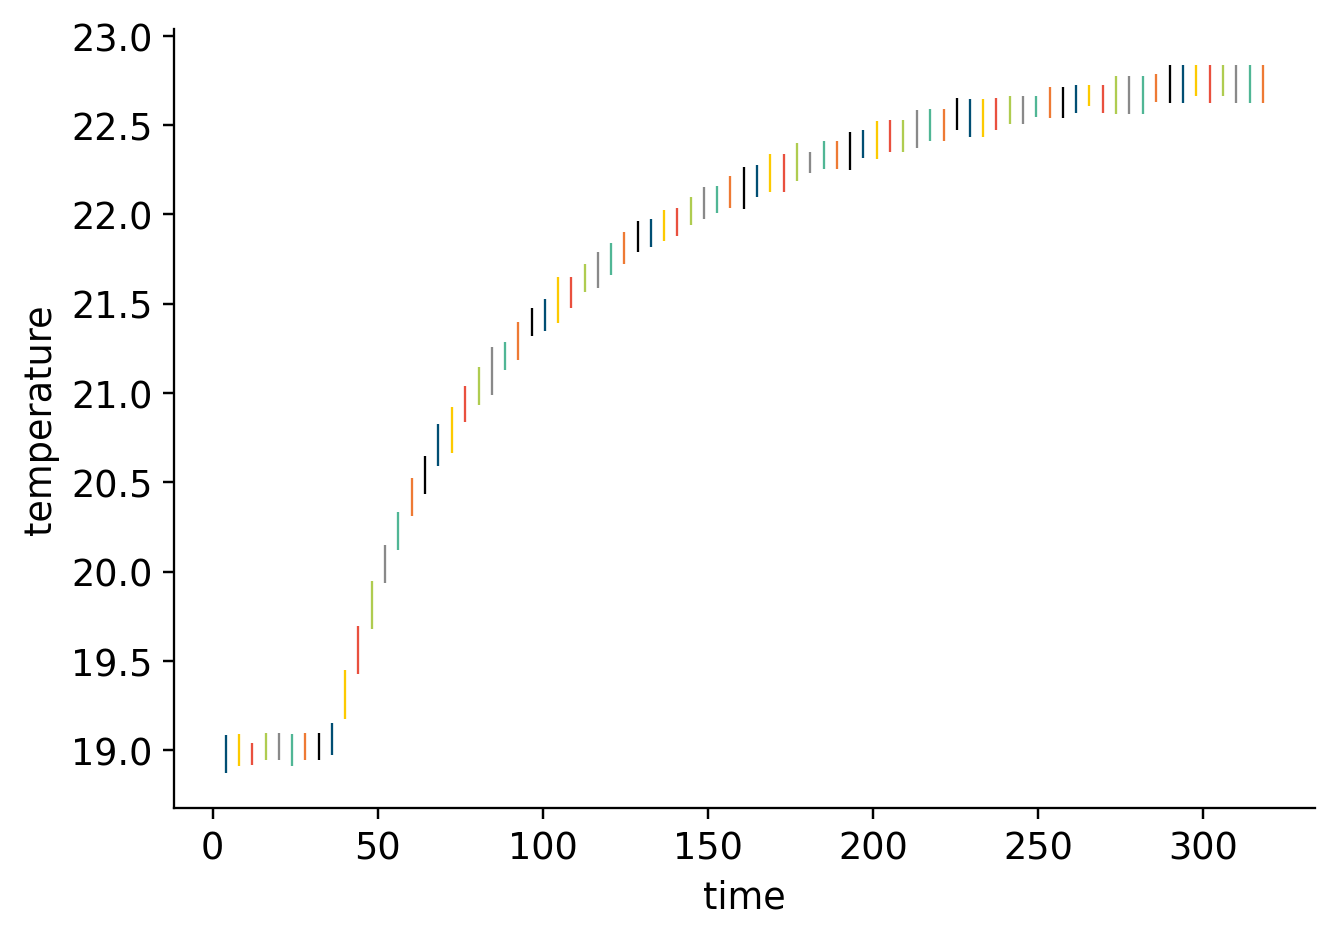

In [295]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

array_temperature_standartabweichung = mean_std_calorimeter[0]                                                          #Array aufteilen (entnehmen gemittelte Temperaturen & Standartabweichungen)
array_zeit = mean_std_calorimeter[1]                                                                                    #Array aufteilen (entnehmen gemittelte Zeiten)
utility.plot_temp_over_time(array_temperature_standartabweichung, array_zeit, 'Legende', 'time', 'temperature')         #Plotten Temperatur-Zeit Diagramm mit Fehlerbalken (Standartabweichungen)

# DONE #

#### (iv) Metadaten auslesen

In [296]:
# TODO: Read mass of the sample from the metadata of the experiment.

folder_path = "/home/pi/calorimetry_laboratory/datasheets"  
uuid = '1ee57b33-4e09-6211-b53e-6567f0eab32f' 
json_path = (["probe", "mass", "value"])
sample_mass = m_json.get_json_entry(folder_path, uuid, json_path)                                                #Masse der Probe aus json Datei auslesen lassen  
# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [297]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

array_temperatur = array_temperature_standartabweichung[0]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(array_temperatur)                   #benötigte Temperatur TM & T1 auslesen
#print(temperature_mix)
#print(temperature_start_water)

# DONE #

In [298]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_bath = mean_std_heater[0][0]
erste_temperature = []
s = 0
while s < 10:
    erste_temperature.append(temperature_bath[s])
    s += 1 

temperature_start_sample = np.sum(erste_temperature)/len(erste_temperature)                                    #benötigte Temperatur T2 ausrechnen (Mittelwert der ersten 10 Einträge des Sensors aus dem Heißbad ausrechnen)

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [299]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))        #Formel für die Berechnung der Wärmekapazität der Probe implementieren

# DONE #

#### (Vii) Ergebnis

In [300]:
sample_heat_capa_2 = (sample_heat_capa, 'J/K*g')
print(sample_heat_capa_2)                                                                                                                       #Wärmekapazität der Probe mit Einheit ausgeben lassen

(1.0830438402991833, 'J/K*g')


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [301]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = '/home/pi/calorimetry_laboratory/data/Measuring_Probe_2/Measuring_Probe_2.h5'  

# DONE #

In [302]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,'RawData')

# DONE #

In [303]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [304]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.
array_temperature = data_dict['temperature']
array_time = data_dict['time']
array_calorimeter = [array_time[index_calorimeter[0]], array_temperature[index_calorimeter[0]], array_time[index_calorimeter[1]], array_temperature[index_calorimeter[1]], array_time[index_calorimeter[2]], array_temperature[index_calorimeter[2]]]
array_environment = [array_time[index_env[0]], array_temperature[index_env[0]]]
array_heater = [array_time[index_bath[0]], array_temperature[index_bath[0]]]
  
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(array_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(array_environment)
mean_std_heater = utility.cal_mean_and_standard_deviation(array_heater)


# DONE #

#### (iii) Daten ploten

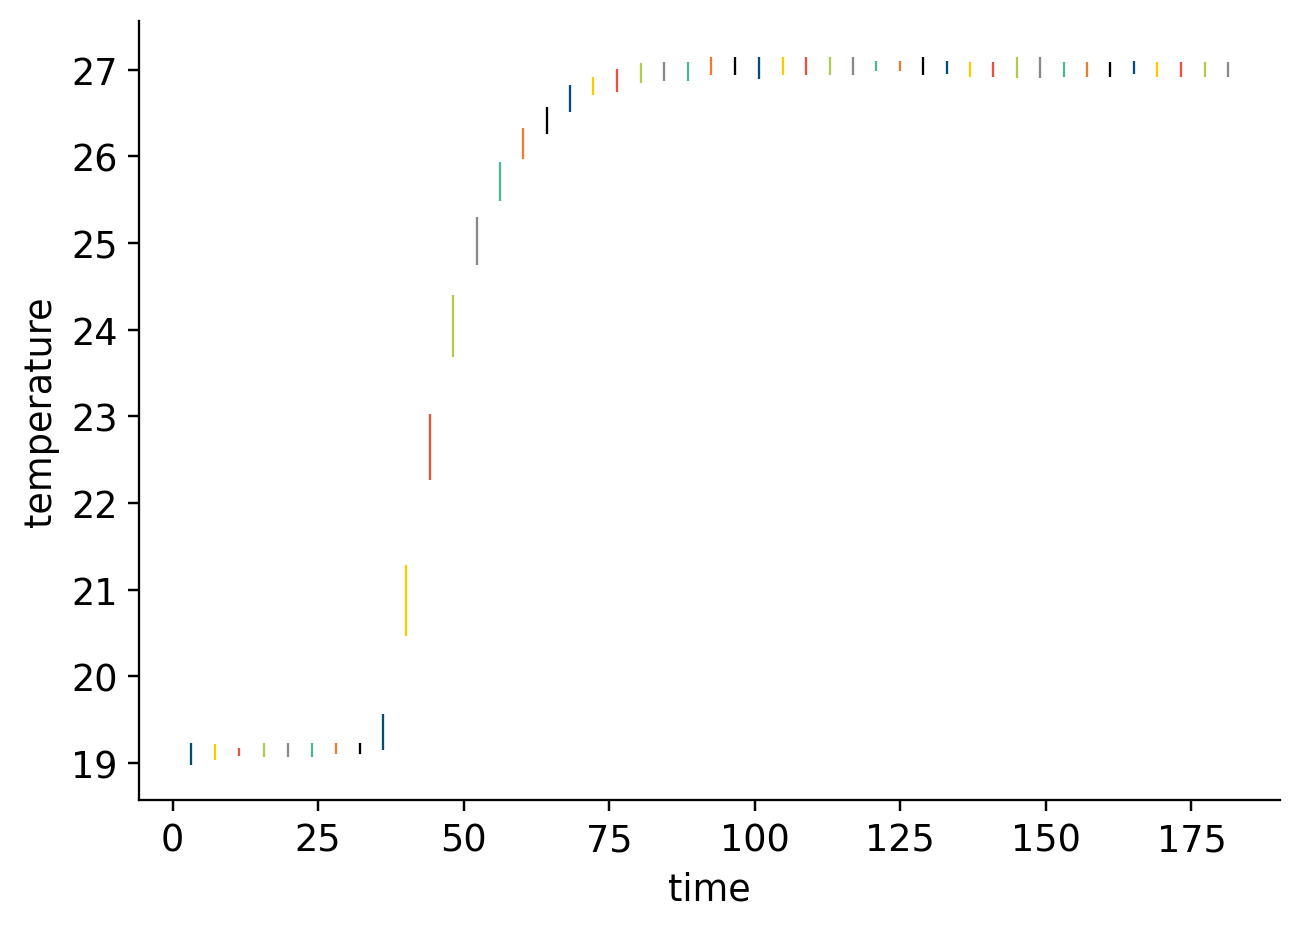

In [305]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

array_temperature_standartabweichung = mean_std_calorimeter[0]
array_zeit = mean_std_calorimeter[1]
utility.plot_temp_over_time(array_temperature_standartabweichung, array_zeit, 'Legende', 'time', 'temperature')

# DONE #

#### (iv) Metadaten auslesen

In [306]:
# TODO: Read mass of the sample from the metadata of the experiment.

folder_path = "/home/pi/calorimetry_laboratory/datasheets"  
uuid = '1ee57b38-1b08-63da-8b38-63a271236a0b' 
json_path = (["probe", "mass", "value"])
sample_mass = m_json.get_json_entry(folder_path, uuid, json_path)  
# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [307]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

array_temperatur = array_temperature_standartabweichung[0]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(array_temperatur) 
#print(temperature_mix)
#print(temperature_start_water)

# DONE #

In [308]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_bath = mean_std_heater[0][0]
erste_temperature = []
s = 0
while s < 10:
    erste_temperature.append(temperature_bath[s])
    s += 1 

temperature_start_sample = np.sum(erste_temperature)/len(erste_temperature)
# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [309]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [310]:
sample_heat_capa_2 = (sample_heat_capa, 'J/K*g')
print(sample_heat_capa_2)

(0.39833295093492876, 'J/K*g')


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [311]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = '/home/pi/calorimetry_laboratory/data/Measuring_Probe_3/Measuring_Probe_3.h5'  

# DONE #

In [312]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,'RawData')

# DONE #

In [313]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [314]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

array_temperature = data_dict['temperature']
array_time = data_dict['time']
array_calorimeter = [array_time[index_calorimeter[0]], array_temperature[index_calorimeter[0]], array_time[index_calorimeter[1]], array_temperature[index_calorimeter[1]], array_time[index_calorimeter[2]], array_temperature[index_calorimeter[2]]]
array_environment = [array_time[index_env[0]], array_temperature[index_env[0]]]
array_heater = [array_time[index_bath[0]], array_temperature[index_bath[0]]]
  
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(array_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(array_environment)
mean_std_heater = utility.cal_mean_and_standard_deviation(array_heater)

# DONE #

#### (iii) Daten ploten

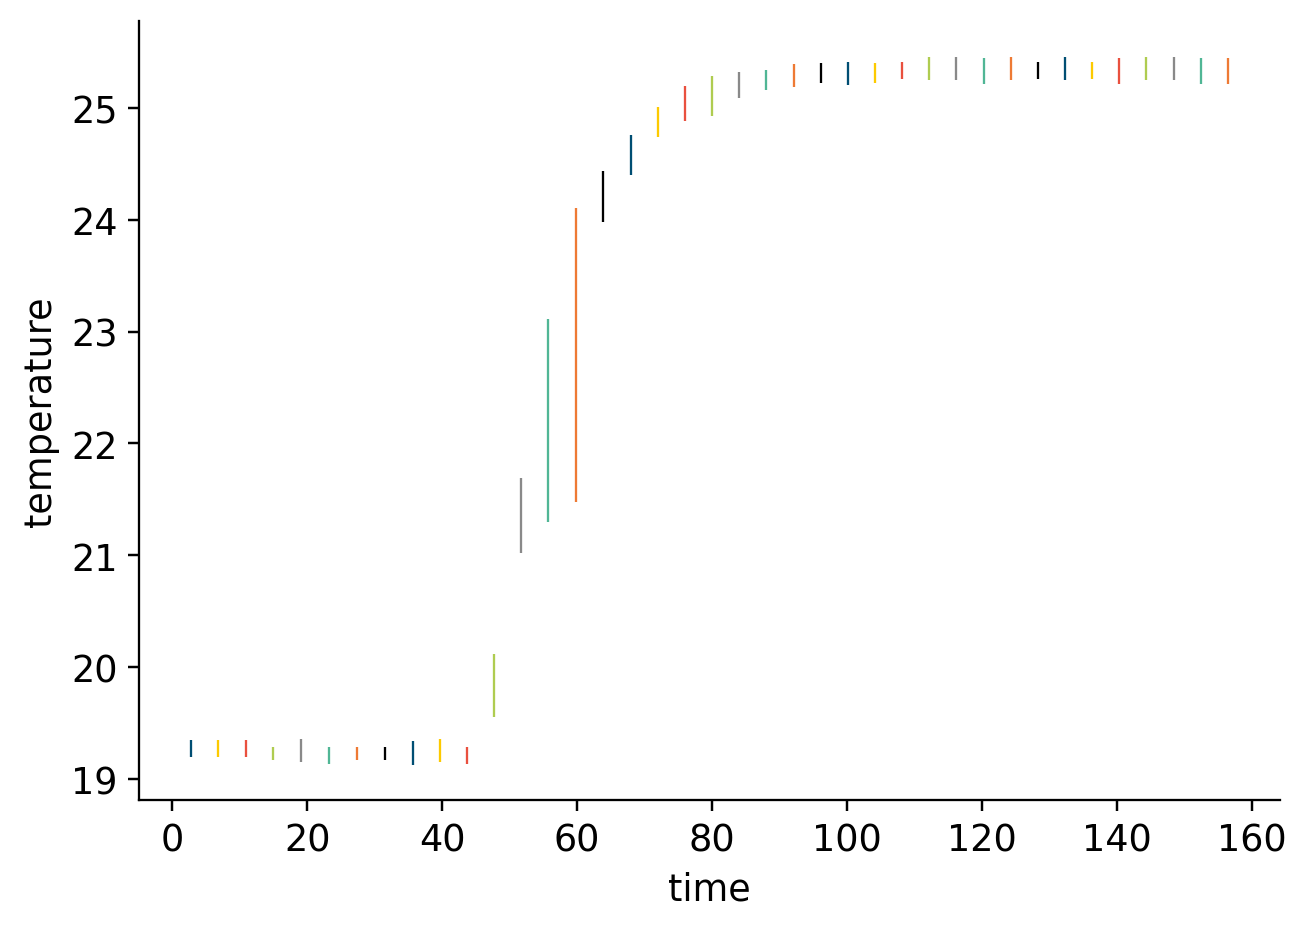

In [315]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

array_temperature_standartabweichung = mean_std_calorimeter[0]
array_zeit = mean_std_calorimeter[1]
utility.plot_temp_over_time(array_temperature_standartabweichung, array_zeit, 'Legende', 'time', 'temperature')

# DONE #

#### (iv) Metadaten auslesen

In [316]:
# TODO: Read mass of the sample from the metadata of the experiment.

folder_path = "/home/pi/calorimetry_laboratory/datasheets"  
uuid = '1ee57b5d-0d38-63d5-91c8-cd9aebf1ac0a' 
json_path = (["probe", "mass", "value"])
sample_mass = m_json.get_json_entry(folder_path, uuid, json_path)  


# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [317]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

array_temperatur = array_temperature_standartabweichung[0]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(array_temperatur) 
#print(temperature_mix)
#print(temperature_start_water)

# DONE #

In [318]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_bath = mean_std_heater[0][0]
erste_temperature = []
s = 0
while s < 10:
    erste_temperature.append(temperature_bath[s])
    s += 1 

temperature_start_sample = np.sum(erste_temperature)/len(erste_temperature)

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [319]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))
# DONE #

#### (Vii) Ergebnis

In [320]:
sample_heat_capa_2 = (sample_heat_capa, 'J/K*g')
print(sample_heat_capa_2)

(0.9025565601263094, 'J/K*g')


## Diskussion
Das Experiment liefert klare und realistische Ergebnisse. Die Größenordnungen der ausgerechneten Werte stimmen und sind sehr nah an Werten die im Internet zu finden sind. Allerdings gibt es einige Fehlerquellen bei unseren vereinfachten Aufbauten. Zum einen stimmen die Wassermengen nicht ganz genau und es gehen immer mal einige Gramm neben dem Aufbau verloren. Außerdem sind unsere eingesetzen Sensoren sehr günstig und haben somit keine sehr genaue Auflösung. Beim auswerten der Messdaten selbst ergeben sich jedoch kaum ungenauigten. Um noch genauere Messwerte am Ende ausrechnen zu wollen bräuchte man einen deutlich treureren und komplexeren Versuchsaufbau.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Mit hat der Versuch persönlich viel spaß gemacht, das auswerten der Messdaten gestaltet sich jedoch wieder sehr aufwendig. Das Projekt trotzdem gut zu erfüllen motiviert einen trotzdem.